# Bài 2: Biến đổi Logarit và Lũy thừa (Gamma)
1. Biến đổi Logarit<br>$g=c \cdot ln(1+f)$<br>Dùng ```cv2.log()``` và ```cv2.add()```
2. Biến đổi Lũy thừa (Gamma)
3. Hiển thị: 2 ảnh
## Ảnh biến đổi Logarit
> Mục đích chính của biến đổi này là điều chỉnh độ tương phản và nén dải động của các giá trị điểm ảnh trong ảnh số

Điều đầu tiên trước khi thao tác hay xử lý với bất kỳ ảnh nào, ta phải chuyển về ảnh xám hết.<br>
Do thư viện của OpenCV hầu hết chỉ hỗ trợ data type float32 nên ta sẽ ép kiểu dữ liệu cho ảnh xám input.<br>
Dùng hàm ```cv2.add()``` thực hiện phép toán $(1 + f)$ <br>
Dùng hàm ```cv2.log()``` thực hiện phép toán $\ln{(1 + f)}$ <br>
Hàm ```cv2.minMaxLoc``` trả về một list các giá trị gồm 
|Biến|Kiểu dữ liệu|Ý nghĩa|
|-|-|-|
|min_val|số thực|Giá trị pixel nhỏ nhất trong toàn bộ ảnh (thường là $0.0$).|
|max_val|số thực|Giá trị pixel lớn nhất trong toàn bộ ảnh (thường là $255.0$ nếu ảnh gốc là 8-bit).|
|min_loc|Tuple $(x, y)$|Tọa độ $(x, y)$ của vị trí mà giá trị nhỏ nhất được tìm thấy lần đầu tiên.|
|max_loc|Tuple $(x, y)$|Tọa độ $(x, y)$ của vị trí mà giá trị lớn nhất được tìm thấy lần đầu tiên.|

Để tính được hằng số c thì trong biểu thức $g = c \cdot \ln{(1+f)}$. Trong đó $f$ là cường độ đầu vào và $g$ là cường độ đầu ra. Ta đã có $f_{max}$ tìm được qua ```cv2.minMaxLoc()```.<br>
Khi đó, để $f_{max}$ thì $g_{max}$. Khi đó biểu thức sẽ trở thành
$$255 = c \cdot \ln{(1+f_{max})}$$
$$\to c = \frac{255}{\ln{(1+f_{max})}}$$
Cuối cùng ta sử dụng hàm ```cv2.convertScaleAbs()``` để thực hiện phép toán $c \cdot \ln{(1+f)}$. Kết quả sẽ là ảnh được lưu trong biến ```log_result```
## Biến đổi Gamma
> Mục tiêu của Biến đổi Gamma (Power-Law Transformations) là điều chỉnh độ tương phản (contrast manipulation) và thực hiện hiệu chỉnh gamma (gamma correction) để đảm bảo hiển thị hình ảnh chính xác trên các thiết bị

Đầu tiên, biến đổi này khác với biến đổi Logarit ở bước đầu là chuyển ảnh xám nằm trong miền [0,255] xuống miền [0,1]. Bởi vì theo công thức toán học có dạng $s=cr^\gamma$, trong đó $s$ là cường độ đầu ra, $r$ là cường độ đầu vào, c và $\gamma$ là các hằng số dương. Trong bài toán này thì có dạng $g=f^\gamma$.<br>
Yêu cầu: $f\in[0,1]$ để có ý nghĩa toán học.<br>
Nói ngắn gọn là ta sẽ sử dụng dải [0,1] trong quá trình tính toán, thao tác trên ảnh nhưng vẫn đảm bảo cuối cùng ảnh đầu ra hợp lệ vẫn phải nằm trong dải [0,255]

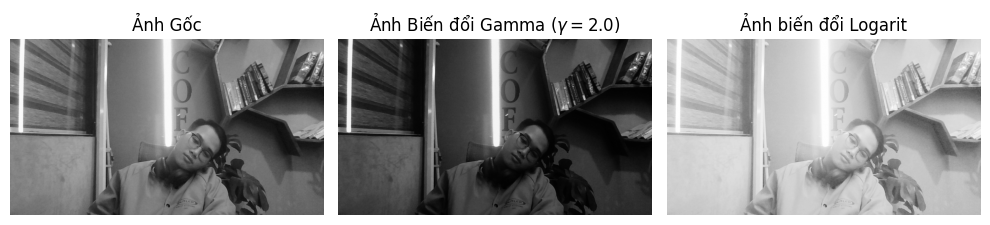

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Xử lý ảnh Gamma
img = cv2.imread("pictures/duy.jpg", cv2.IMREAD_GRAYSCALE)

img_float = img / 255.0
img_float_norm = img_float.astype(np.float32)

f_gamma = cv2.pow(img_float_norm, 2.0) # gamma = 2.0

gamma_img = cv2.convertScaleAbs(f_gamma, alpha=255.0)

# Xử lý ảnh biến đổi Logarit
img_float_log = img.astype(np.float32)

ln_one_plus_f = cv2.log(cv2.add(1.0, img_float_log))

min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(img_float_log)
c = 255.0 / np.log(1 + max_val)

log_result = cv2.convertScaleAbs(ln_one_plus_f, alpha=c)

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Ảnh Gốc")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(gamma_img, cmap='gray')
plt.title(r"Ảnh Biến đổi Gamma ($\gamma=2.0$)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(log_result, cmap='gray')
plt.title("Ảnh biến đổi Logarit")
plt.axis("off")

plt.tight_layout()
plt.show()

Ta có thể thấy là biến đổi Logarit cho ra ảnh sáng hơn. Nhưng đối với ảnh biến đổi gamma, ta có thể điều chỉnh linh hoạt sáng tối tùy ý, cụ thể:
- Khi $\gamma \lt 1$: Ảnh có xu hướng sáng hơn. Dùng để nêu bật các vùng có chi tiết tối trong ảnh
- Khi $\gamma > 1$: Ảnh có xu hướng tối hơn, thường $\gamma$ sẽ nằm trong khoảng [1.8, 2.5]. Giúp làm ảnh tối hơn, nêu bật các chi tiết trong các vùng sáng.
# Kết luận
*Khi nào dùng biến đổi Gamma hay Loga?* <br>
Biến đổi Loga là lựa chọn tốt khi:
- Ảnh có dải tần số động rất rộng (HDR) (Nén ảnh về dải hẹp mà màn hình có thể hiển thị được)
- Ảnh quá tối

Biến đổi Gamma:
- Điều chỉnh độ sáng tổng thể bằng cách hiệu chỉnh $\gamma$
- Hiệu chỉnh thiết bị